# This is the jupyter notebook to produce our figures.

## 1. data prepare

In [38]:
data = '/home/bridge/nd20983/public_html/AMOC_paper_2024/data_processed.xlsx'

## Fig.2

Text(0.15, 7, 'P value = 5.65e-05')

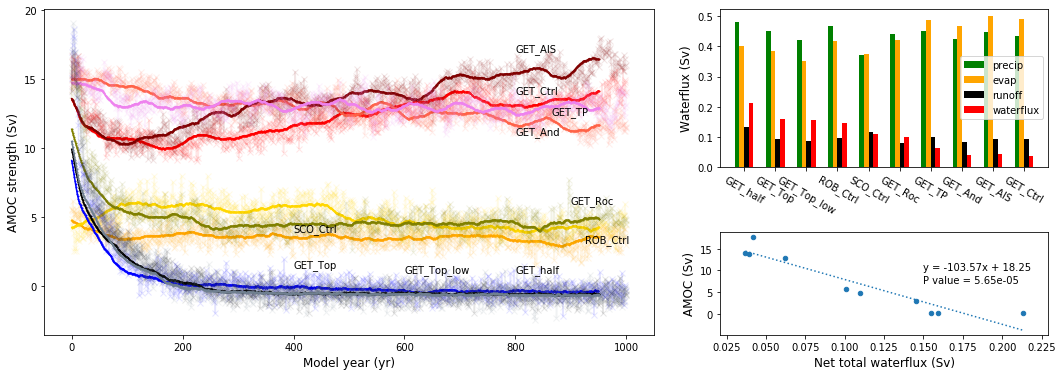

In [39]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

##----------------------------------------------------------------------------------------------##
# figure configuration
fig = plt.figure(figsize=(18,6))
gs0 = gridspec.GridSpec(6, 18, figure=fig)
ax0 = fig.add_subplot(gs0[:, :11])
ax1 = fig.add_subplot(gs0[:3, 12:])
ax2 = fig.add_subplot(gs0[4:, 12:])
##----------------------------------------------------------------------------------------------##

#read data
df_whole = pd.read_excel(data,skiprows=1,
                  sheet_name = ['expt_sum','waterflux','monthly_mean','amoc_time_series','lin_regression']
                )
df = df_whole['amoc_time_series']

#plot1
ax0.plot(df['xpgxa'][0:1000], c='red', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpgxa'][0:1000], np.ones(50)/50, mode='valid'), label='xpgxa', markersize=1, c='red', marker='o',)
ax0.plot(df['xpgxs'], c='tomato', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpgxs'], np.ones(50)/50, mode='valid'), label='xpgxs', markersize=1, c='tomato', marker='o',)
ax0.plot(df['xpgxx'][0:1000], c='maroon', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpgxx'][0:1000], np.ones(50)/50, mode='valid'), label='xpgxx', markersize=1, c='maroon', marker='o',)
ax0.plot(df['xpgxt'], c='violet', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpgxt'], np.ones(50)/50, mode='valid'), label='xpgxt', markersize=1, c='violet', marker='o',)

ax0.plot(df['xpgxb'][0:1000], c='orange', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpgxb'][0:1000], np.ones(50)/50, mode='valid'), label='xpgxb', markersize=1, c='orange', marker='o',)
ax0.plot(df['xpgxc'][0:1000], c='gold', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpgxc'][0:1000], np.ones(50)/50, mode='valid'), label='xpgxc', markersize=1, c='gold', marker='o',)
ax0.plot(df['xpgxr'], c='olive', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpgxr'], np.ones(50)/50, mode='valid'), label='xpgxr', markersize=1, c='olive', marker='o',)

ax0.plot(df['xpgxw'], c='blue', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpgxw'], np.ones(50)/50, mode='valid'), label='xpgxw', markersize=1, c='blue', marker='o',)
ax0.plot(df['xpgxh'], c='black', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpgxh'], np.ones(50)/50, mode='valid'), label='xpgxh', markersize=1, c='black', marker='o',)
ax0.plot(df['xpecy'], c='slategray', marker='x', alpha=0.1)
ax0.plot(np.convolve(df['xpecy'], np.ones(50)/50, mode='valid'), label='xpecy', markersize=1, c='slategray', marker='o',)

# setup
font_legend = font_manager.FontProperties(#family='Times New Roman',
                                          weight='normal',
                                          style='normal', size=13)
font_label = {#'family': 'Times New Roman',
              'weight': 'normal',
              'size': 12
             }
font_title = {#'family': 'Times New Roman',
              'weight': 'normal',
              'size': 20
             }
ax0.set_xlabel('Model year (yr)', fontdict=font_label)
ax0.set_ylabel('AMOC strength (Sv)', fontdict=font_label)
yminorLocator = MultipleLocator(0.025)

#add annotations for each experiment
ax0.text(x=800, y=17, s='GET_AIS')
ax0.text(x=800, y=14, s='GET_Ctrl')
ax0.text(x=865, y=12.5, s='GET_TP')
ax0.text(x=800, y=11, s='GET_And')
ax0.text(x=900, y=6.0, s='GET_Roc')
ax0.text(x=400, y=4.0, s='SCO_Ctrl')
ax0.text(x=925, y=3.2, s='ROB_Ctrl')
ax0.text(x=400, y=1.4, s='GET_Top')
ax0.text(x=600, y=1.0, s='GET_Top_low')
ax0.text(x=800, y=1.0, s='GET_half')

##----------------------------------------------------------------------------------------------##
#read data
df_wf = df_whole['lin_regression']
df1 = df_wf.iloc[0:10]

#labels = list(df['expt'].items())
labels = ['GET_half','GET_Top','GET_Top_low','ROB_Ctrl','SCO_Ctrl','GET_Roc','GET_TP','GET_And','GET_AIS','GET_Ctrl']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

rects1 = ax1.bar(x - width*1.5, df1['precipitation'], width, color='green', label='precip')
rects2 = ax1.bar(x - width/2, df1['evaporation'], width, color='orange', label='evap')
rects3 = ax1.bar(x + width/2, df1['runoff'], width, color='black', label='runoff')
rects4 = ax1.bar(x + width*1.5, df1['waterflux_djf'], width, color='red', label='waterflux')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Waterflux (Sv)', fontdict=font_label)

#ax1.set_title('Waterflux and components distribution (N.Atl Annual mean)')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=-30)
#ax.set_xticks(labels)
ax1.legend(loc='center right')

ax1.set_label(rects1)
ax1.set_label(rects2)
ax1.set_label(rects3)
ax1.set_label(rects4)

##----------------------------------------------------------------------------------------------##
#read data
data_1 = df1
model = LinearRegression(fit_intercept=True)
model.fit(data_1[["waterflux_djf"]], data_1["AMOC"])

x_fit = DataFrame([data_1["waterflux_djf"].min(), data_1["waterflux_djf"].max()])
y_pred = model.predict(x_fit)

data_1.plot.scatter("waterflux_djf", "AMOC", ax=ax2)
ax2.plot(x_fit[0], y_pred, linestyle=":")
ax2.set_xlabel('Net total waterflux (Sv)', fontdict=font_label)
ax2.set_ylabel('AMOC (Sv)', fontdict=font_label)
ax2.text(x=0.15, y=10, s="y = -103.57x + 18.25")
ax2.text(x=0.15, y=7, s='P value = 5.65e-05')

## Fig.S10

[<matplotlib.axes._subplots.AxesSubplot object at 0x2b19bc6ac4d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x2b19da6d66d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x2b19da30f550>]


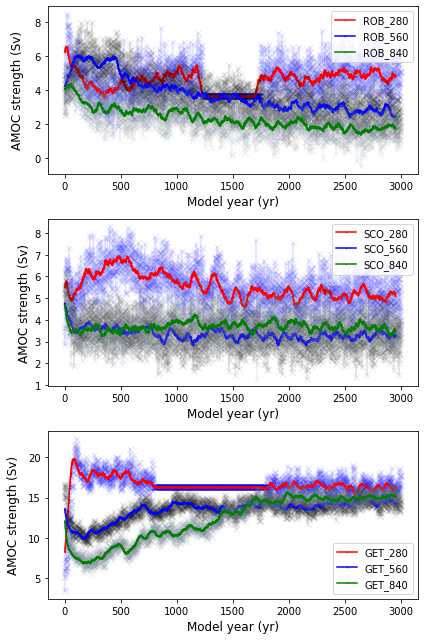

In [44]:
##----------------------------------------------------------------------------------------------##
# figure configuration
fig,axs = plt.subplots(3, 1, figsize=(6,9))
##----------------------------------------------------------------------------------------------##

#read data
df_whole = pd.read_excel(data,skiprows=1,
                  sheet_name = ['expt_sum','waterflux','monthly_mean','amoc_time_series','lin_regression','co2']
                )
df_co2 = df_whole['co2']

#plot1
ax0 = axs[0]
ax1 = axs[1]
ax2 = axs[2]

ax0.plot(df_co2['xpecc'], c='blue', marker='x', alpha=0.1)
ax0.plot(np.convolve(df_co2['xpecc'], np.ones(50)/50, mode='valid'), label='ROB_280', markersize=0.5, c='red', marker='s',)
ax0.plot(df_co2['xpgxc'], c='black', marker='x', alpha=0.1)
ax0.plot(np.convolve(df_co2['xpgxc'], np.ones(50)/50, mode='valid'), label='ROB_560', markersize=0.5, c='blue', marker='s',)
ax0.plot(df_co2['xphac'], c='slategray', marker='x', alpha=0.1)
ax0.plot(np.convolve(df_co2['xphac'], np.ones(50)/50, mode='valid'), label='ROB_840', markersize=0.5, c='green', marker='s',)

ax1.plot(df_co2['xpecb'], c='blue', marker='x', alpha=0.1)
ax1.plot(np.convolve(df_co2['xpecb'], np.ones(50)/50, mode='valid'), label='SCO_280', markersize=0.5, c='red', marker='s',)
ax1.plot(df_co2['xpgxb'], c='black', marker='x', alpha=0.1)
ax1.plot(np.convolve(df_co2['xpgxb'], np.ones(50)/50, mode='valid'), label='SCO_560', markersize=0.5, c='blue', marker='s',)
ax1.plot(df_co2['xphab'], c='slategray', marker='x', alpha=0.1)
ax1.plot(np.convolve(df_co2['xphab'], np.ones(50)/50, mode='valid'), label='SCO_840', markersize=0.5, c='green', marker='s',)

ax2.plot(df_co2['xpeca'], c='blue', marker='x', alpha=0.1)
ax2.plot(np.convolve(df_co2['xpeca'], np.ones(50)/50, mode='valid'), label='GET_280', markersize=0.5, c='red', marker='s',)
ax2.plot(df_co2['xpgxa'], c='black', marker='x', alpha=0.1)
ax2.plot(np.convolve(df_co2['xpgxa'], np.ones(50)/50, mode='valid'), label='GET_560', markersize=0.5, c='blue', marker='s',)
ax2.plot(df_co2['xphaa'], c='slategray', marker='x', alpha=0.1)
ax2.plot(np.convolve(df_co2['xphaa'], np.ones(50)/50, mode='valid'), label='GET_840', markersize=0.5, c='green', marker='s',)

# setup
font_legend = font_manager.FontProperties(#family='Times New Roman',
                                          weight='normal',
                                          style='normal', size=13)
font_label = {#'family': 'Times New Roman',
              'weight': 'normal',
              'size': 12
             }
font_title = {#'family': 'Times New Roman',
              'weight': 'normal',
              'size': 20
             }

ax0.set_xlabel('Model year (yr)', fontdict=font_label)
ax0.set_ylabel('AMOC strength (Sv)', fontdict=font_label, labelpad=11)
#ax0_ymajorLocator = MaxNLocator(nbins=6)
#ax0.yaxis.set_major_locator(ax0_ymajorLocator)
ax0.legend(loc='upper right')

ax1.set_xlabel('Model year (yr)', fontdict=font_label)
ax1.set_ylabel('AMOC strength (Sv)', fontdict=font_label)
#ax1_ymajorLocator = MaxNLocator(nbins=6)
#ax1.yaxis.set_major_locator(ax1_ymajorLocator)
ax1.legend()

ax2.set_xlabel('Model year (yr)', fontdict=font_label)
ax2.set_ylabel('AMOC strength (Sv)', fontdict=font_label, labelpad=8)
#ax2_ymajorLocator = MaxNLocator(nbins=6)
#ax2.yaxis.set_major_locator(ax2_ymajorLocator)
ax2.legend()

plt.tight_layout()
print(fig.axes)